# Avocado Price Forecasts

In [2]:
pip install fbprophet

In [0]:
!pip install -q matplotlib-venn

In [4]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from fbprophet import Prophet

In [0]:
#Loading all the csv files
df = pd.read_csv("avocado.csv")

In [0]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [8]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
df1.set_index('Date')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


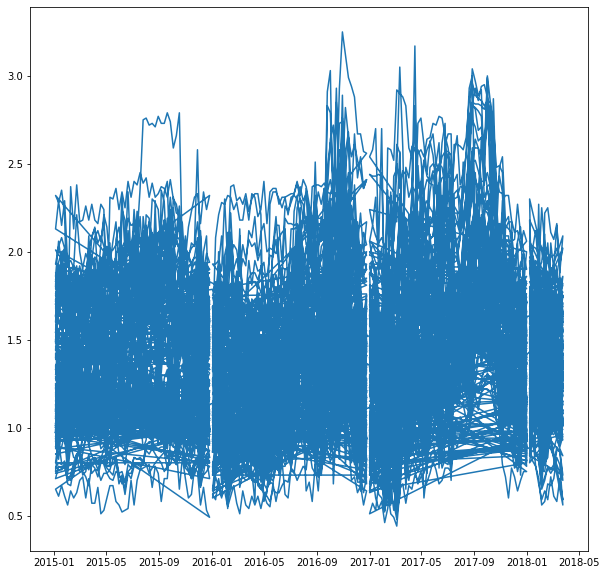

In [11]:
plt.figure(figsize=(10,10))
plt.plot(df1['Date'], df1['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

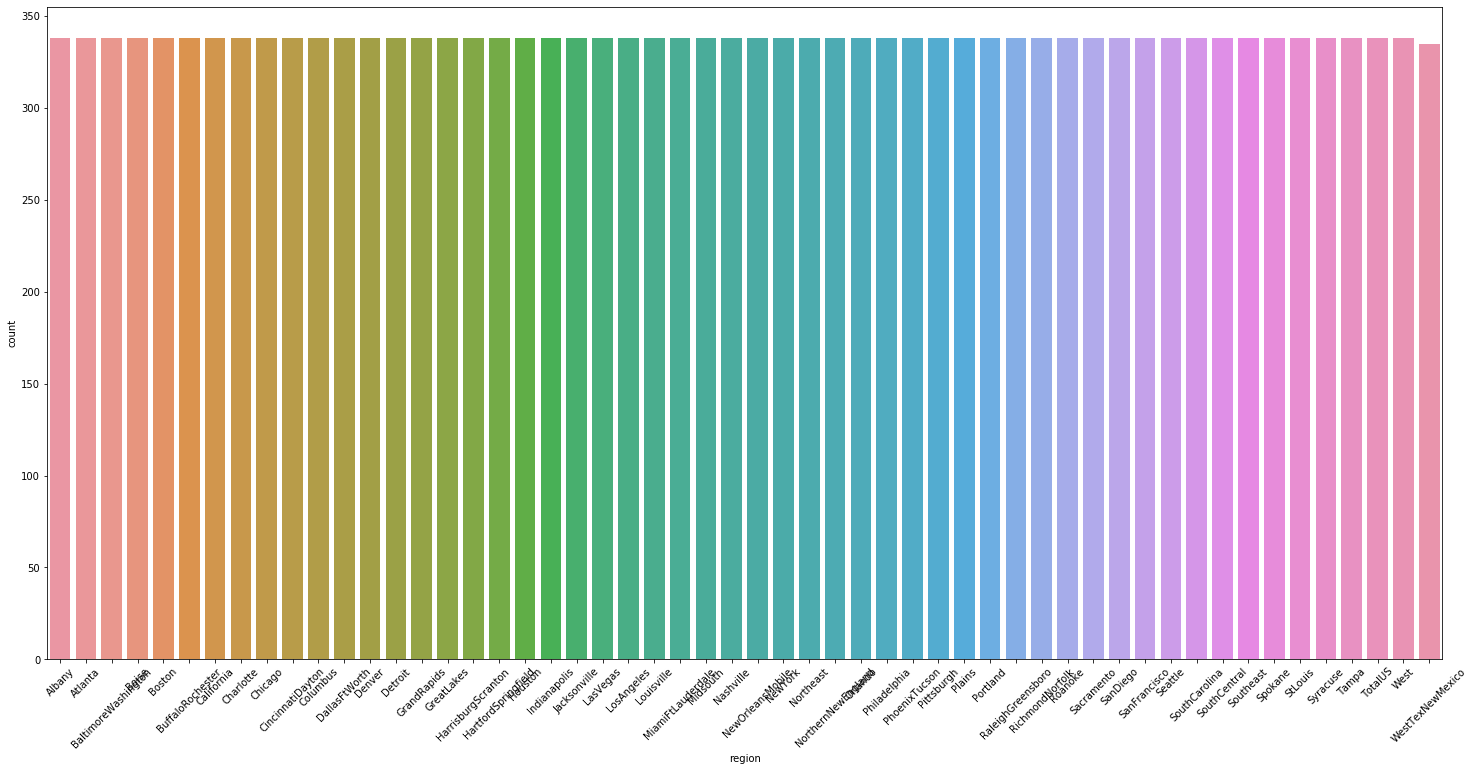

In [12]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df1)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

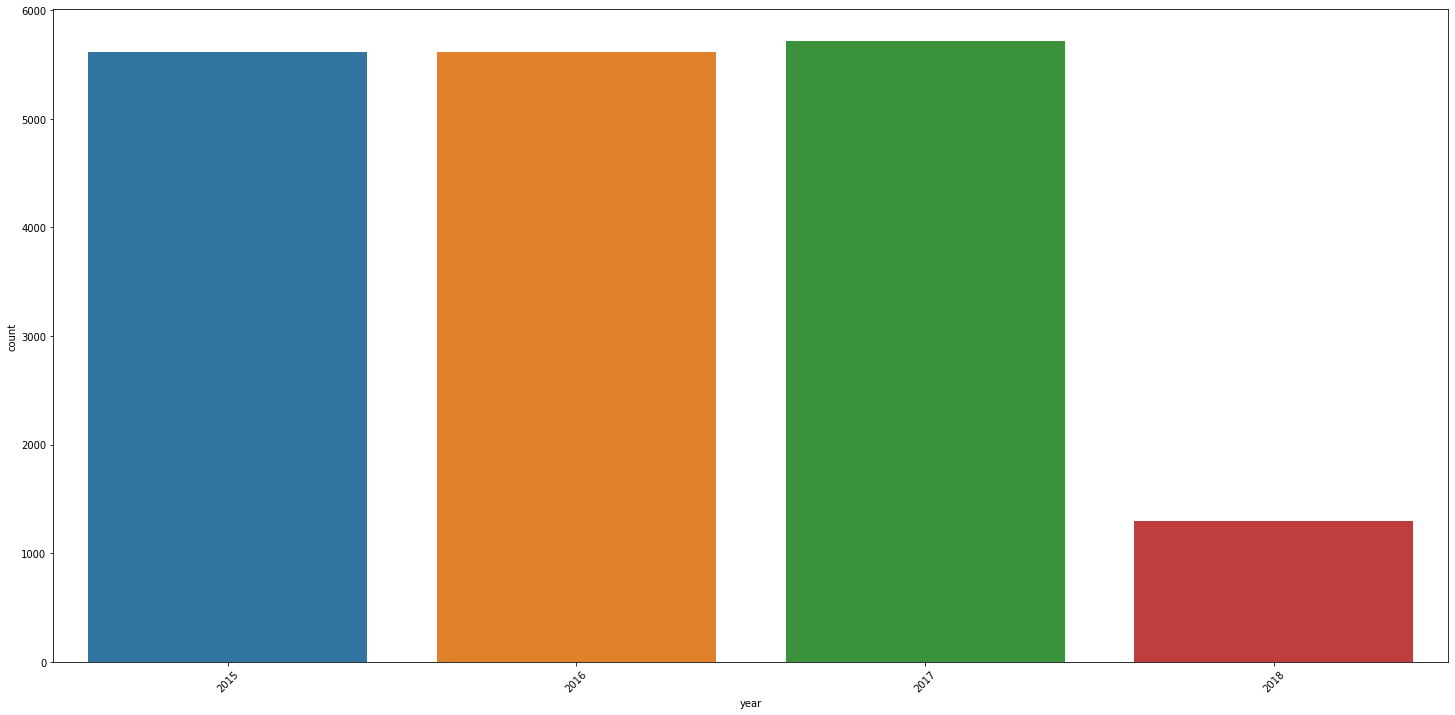

In [13]:
# Bar Chart to indicate the year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df1)
plt.xticks(rotation = 45)

### Conventional vs Organic Avocadoes:

In [14]:
df1['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



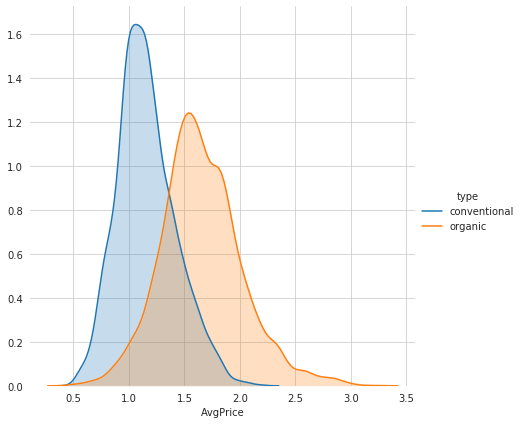

In [15]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df1,hue='type',size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [0]:
#Function for selecting region and type
def reg(r,t):
    dfs = df1[(df1.region ==r) & (df1.type == t) ]
    dfs1=dfs.set_index('Date')
    return dfs1   

All the analysis that follows is for the region and type selected in the below cell.

Enter below the Region and Type of the Avocado:

In [0]:
from datetime import datetime
df2=reg('TotalUS','conventional') 


# Average Price Distribution : 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



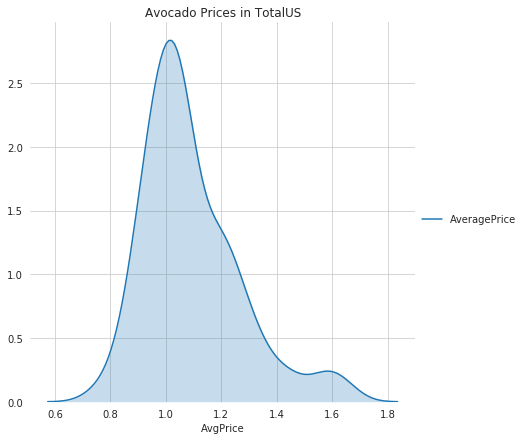

In [18]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df2,size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
plt.title('Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

### Forecasting the future prices of Avocado (Using FBPROPHET)

In [0]:
df2.reset_index(inplace=True) #Removing the datetime index

In [20]:
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
date_price.head()

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


Fitting the model Using Prophet: 

In [21]:
m = Prophet()
m.fit(date_price)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


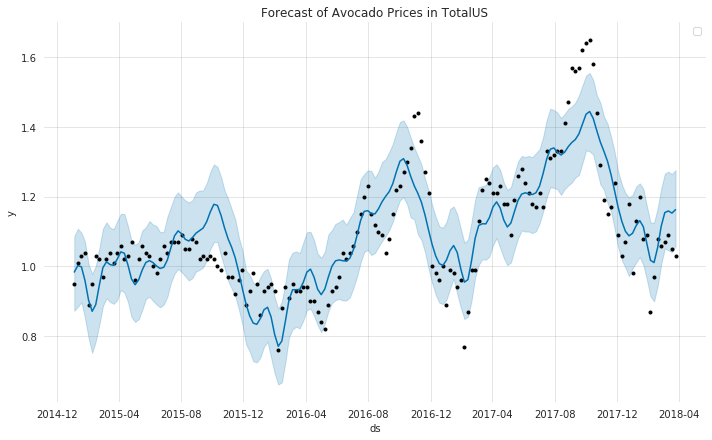

In [22]:
future = m.make_future_dataframe(periods=0)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.legend()
plt.title('Forecast of Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.099075,0.873092,1.085875,1.099075,1.099075,-0.115209,-0.115209,-0.115209,-0.115209,-0.115209,-0.115209,0.0,0.0,0.0,0.983865
1,2015-01-11,1.095623,0.884613,1.108210,1.095623,1.095623,-0.093090,-0.093090,-0.093090,-0.093090,-0.093090,-0.093090,0.0,0.0,0.0,1.002533
2,2015-01-18,1.092171,0.897686,1.096747,1.092171,1.092171,-0.093247,-0.093247,-0.093247,-0.093247,-0.093247,-0.093247,0.0,0.0,0.0,0.998924
3,2015-01-25,1.088719,0.851847,1.070924,1.088719,1.088719,-0.129277,-0.129277,-0.129277,-0.129277,-0.129277,-0.129277,0.0,0.0,0.0,0.959442
4,2015-02-01,1.085267,0.795152,1.006419,1.085267,1.085267,-0.182004,-0.182004,-0.182004,-0.182004,-0.182004,-0.182004,0.0,0.0,0.0,0.903263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-02-25,1.216043,1.006916,1.223118,1.216043,1.216043,-0.100616,-0.100616,-0.100616,-0.100616,-0.100616,-0.100616,0.0,0.0,0.0,1.115427
165,2018-03-04,1.215312,1.051850,1.265971,1.215312,1.215312,-0.060976,-0.060976,-0.060976,-0.060976,-0.060976,-0.060976,0.0,0.0,0.0,1.154336
166,2018-03-11,1.214582,1.046252,1.271764,1.214582,1.214582,-0.055469,-0.055469,-0.055469,-0.055469,-0.055469,-0.055469,0.0,0.0,0.0,1.159113
167,2018-03-18,1.213851,1.040866,1.264276,1.213851,1.213851,-0.060941,-0.060941,-0.060941,-0.060941,-0.060941,-0.060941,0.0,0.0,0.0,1.152910


In [53]:
from sklearn.metrics import r2_score
error = mean_squared_error(date_price['y'],forecast['yhat'])
print('Test MSE: %.3f' % error)

Test MSE: 0.046


In the above figure 'yhat' is the forecasted Avocado Prices in the year 2019

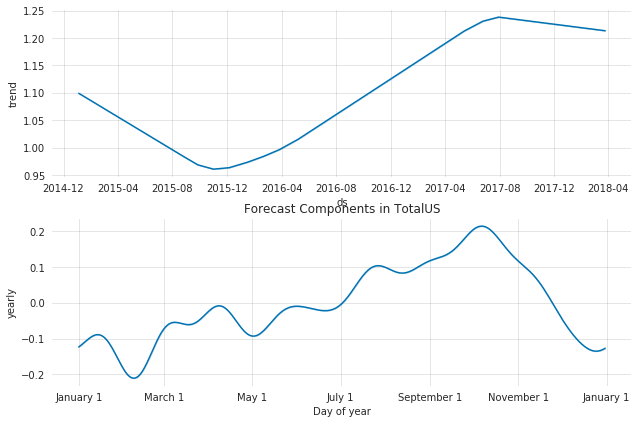

In [25]:
fig2 = m.plot_components(forecast)
plt.title('Forecast Components in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

# Using ARIMA to forecast the Prices:

In [0]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

import warnings

In [27]:
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


Remove all other rows as we only need Date and AveragePrice

In [28]:
df3=df2.drop(['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region'],axis=1)
df3.head()

,Date,AveragePrice
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


In [0]:
df3.set_index('Date',inplace=True)

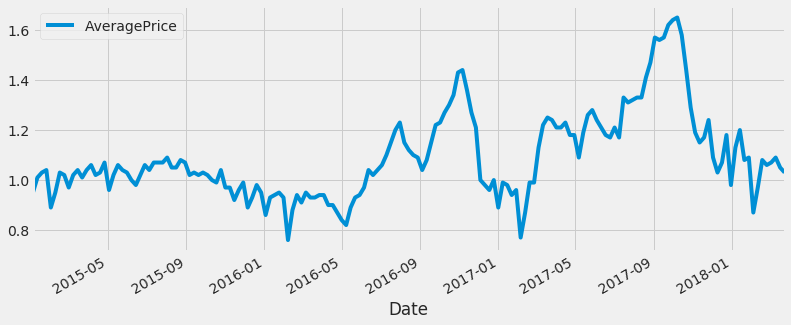

In [30]:
df3.plot()


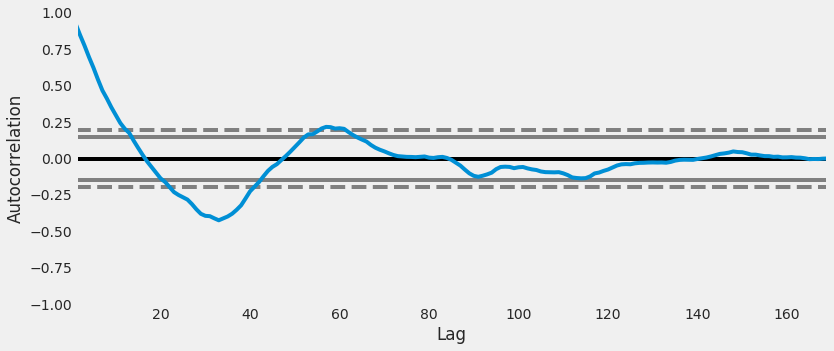

In [31]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
autocorrelation_plot(df3)
plt.show()

In [32]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(df3.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.061
ARIMA(0, 0, 1) MSE=0.023
ARIMA(0, 1, 0) MSE=0.006
ARIMA(0, 1, 1) MSE=0.006
ARIMA(0, 1, 2) MSE=0.007
ARIMA(0, 1, 3) MSE=0.007
ARIMA(0, 2, 0) MSE=0.012
ARIMA(0, 2, 1) MSE=0.006
ARIMA(1, 0, 0) MSE=0.006
ARIMA(1, 0, 1) MSE=0.006
ARIMA(1, 0, 2) MSE=0.006
ARIMA(1, 0, 3) MSE=0.006
ARIMA(1, 1, 0) MSE=0.006
ARIMA(1, 2, 0) MSE=0.009
ARIMA(1, 2, 1) MSE=0.006
ARIMA(1, 2, 2) MSE=0.006
ARIMA(1, 2, 3) MSE=0.007
ARIMA(2, 0, 0) MSE=0.006
ARIMA(2, 0, 1) MSE=0.006
ARIMA(2, 1, 0) MSE=0.007
ARIMA(2, 1, 1) MSE=0.007
ARIMA(2, 2, 0) MSE=0.008
ARIMA(2, 2, 1) MSE=0.007
ARIMA(2, 2, 3) MSE=0.007
ARIMA(3, 0, 0) MSE=0.006
ARIMA(3, 0, 1) MSE=0.007
ARIMA(3, 1, 0) MSE=0.007
ARIMA(3, 1, 1) MSE=0.007
ARIMA(3, 2, 0) MSE=0.009
ARIMA(3, 2, 1) MSE=0.007
Best ARIMA(0, 1, 0) MSE=0.006


In [44]:
model = ARIMA(df3['AveragePrice'], order = (1, 0, 0))
results_ARIMA = model.fit()
predictions = round(results_ARIMA.predict(), 2)
preds = pd.DataFrame(list(zip(list(predictions.index),list(predictions))),columns=['Date',
                                                                                   'PredictedPrice']).set_index('Date')
predicted_df = pd.merge(df3[1:], preds, left_index=True, right_index=True)
predicted_df.head()

,AveragePrice,PredictedPrice
Date,,
2015-12-20,0.98,0.96
2015-12-13,0.93,0.99
2015-12-06,0.89,0.94
2015-11-29,0.99,0.90
2015-11-22,0.96,1.00


In [45]:
print("\tMean Squared Error:", mean_squared_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(predicted_df['AveragePrice'], 
                                                               predicted_df['PredictedPrice'])))



	Mean Squared Error: 0.004286309523809524
	Root Mean Squared Error: 0.06546991311900088


but then when we use ARIMA's .plot_predict, we notice that the forecast is actually not very good at all.

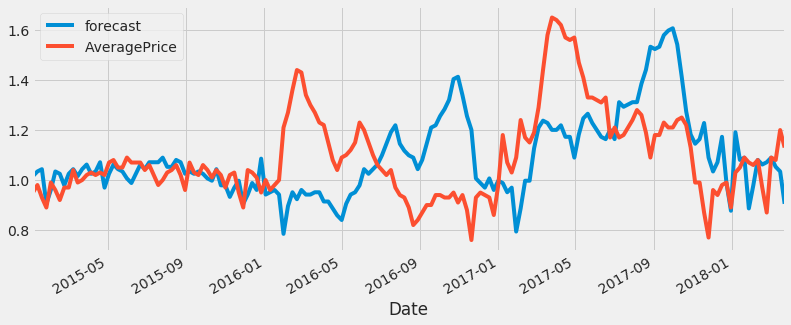

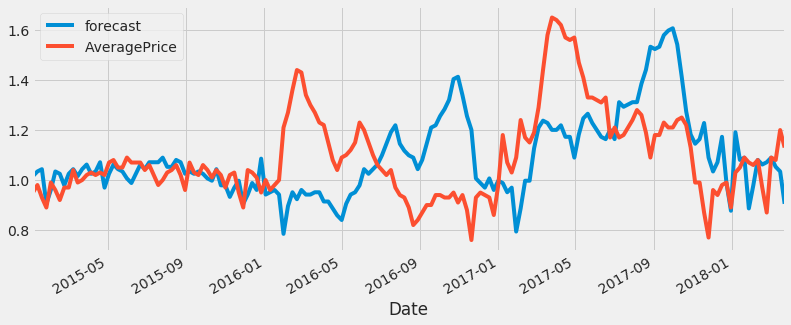

In [46]:
results_ARIMA.plot_predict()

Hence we use SARIMAX


In [47]:
mod = sm.tsa.statespace.SARIMAX(df3['AveragePrice'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

SARIMAX_results = mod.fit()

SARIMAX_predictions = SARIMAX_results.predict()

SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),list(SARIMAX_predictions))),
                             columns=['Date','PredictedPrice']).set_index('Date')

SARIMAX_predicted_df = pd.merge(df3[1:], SARIMAX_preds, left_index=True, right_index=True)
SARIMAX_predicted_df.head()

,AveragePrice,PredictedPrice
Date,,
2015-12-20,0.98,0.947577
2015-12-13,0.93,0.977501
2015-12-06,0.89,0.927628
2015-11-29,0.99,0.887730
2015-11-22,0.96,0.987475


In [48]:
print("\tMean Squared Error:", mean_squared_error(SARIMAX_predicted_df['AveragePrice'], 
                                                  SARIMAX_predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(SARIMAX_predicted_df['AveragePrice'], 
                                                               SARIMAX_predicted_df['PredictedPrice'])))

	Mean Squared Error: 0.0043881412390243445
	Root Mean Squared Error: 0.06624304672208506


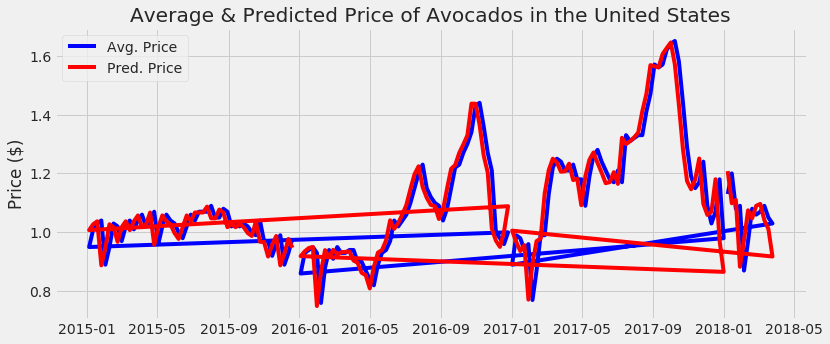

In [54]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_df['AveragePrice'],c='b',label='Avg. Price')
ax.plot(SARIMAX_predicted_df['PredictedPrice'],c='r', label='Pred. Price')


plt.legend(loc='best')
plt.ylabel('Price ($)')
plt.title('Average & Predicted Price of Avocados in the United States')
plt.draw()